# Importing Libraries

In [1]:
import os
import pandas as pd
import tensorflow as tf
import keras
from keras.utils import FeatureSpace

# Downloading the Data

In [2]:
!wget https://raw.githubusercontent.com/IAMPathak2702/Loan_status_prediction-TFX-pipeline/main/data/loan_data_set.csv

--2024-03-25 17:55:00--  https://raw.githubusercontent.com/IAMPathak2702/Loan_status_prediction-TFX-pipeline/main/data/loan_data_set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37398 (37K) [text/plain]
Saving to: ‘loan_data_set.csv.1’

loan_data_set.csv.1 100%[===================>]  36.52K  --.-KB/s    in 0.005s  

2024-03-25 17:55:00 (7.84 MB/s) - ‘loan_data_set.csv.1’ saved [37398/37398]



In [3]:
df = pd.read_csv("/content/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Preprocessing Data

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Sort columns with there Category

In [5]:
NUMERICAL_FEATURES = ['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term',]

CATEGORICAL_FEATURES =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Loan_Status']

NUMERICAL_CATEGORICAL_FEATURES=['Credit_History']

LABEL_KEY = 'LoanAmount'

COLUMNS_TO_DROP=["Loan_ID"]

## Fill missing Values and  Drop unnecessary columns

In [6]:
df.drop(COLUMNS_TO_DROP , axis=1,inplace=True)

# filling with mode for categorical variables
for column in CATEGORICAL_FEATURES:
    df[column].fillna(df[column].mode()[0], inplace=True)

# filling with median for numerical variables
for column in NUMERICAL_FEATURES:
    df[column].fillna(df[column].median(), inplace=True)

for column in NUMERICAL_CATEGORICAL_FEATURES:
    df[column].fillna(df[column].median(), inplace=True)



# Filling missing values in the label column
df[LABEL_KEY] = df[LABEL_KEY].fillna(df[LABEL_KEY].median())

In [7]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## modify and adjust types of data

In [8]:
# Replace "3+" with "3" in the "Dependents" column
df["Dependents"] = df["Dependents"].replace("3+", "3")

# Casting Dependents column to int32
df["Dependents"] = df["Dependents"].astype(int)
df["ApplicantIncome"] = df["ApplicantIncome"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


# Split the dataset into Train and Val

In [10]:
from sklearn.model_selection import train_test_split

traindf,valdf = train_test_split(df)

traindf.shape , valdf.shape

((460, 12), (154, 12))

### checking data before feeding into the model

In [11]:
traindf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
578,Male,Yes,1,Graduate,No,1782.0,2232.0,107.0,360.0,1.0,Rural,Y
559,Female,Yes,0,Graduate,No,4180.0,2306.0,182.0,360.0,1.0,Semiurban,Y
365,Male,No,0,Not Graduate,No,6216.0,0.0,133.0,360.0,1.0,Rural,N
386,Male,No,0,Not Graduate,No,2346.0,1600.0,132.0,360.0,1.0,Semiurban,Y
105,Male,Yes,1,Graduate,No,3052.0,1030.0,100.0,360.0,1.0,Urban,Y


In [12]:
traindf.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Convert dataframe to tensorflow dataset

In [13]:
import tensorflow as tf

def data_to_Dataset(ds):
    ds = ds.copy()
    labels = ds.pop("LoanAmount")  # Extract labels and remove from features
    dataset = tf.data.Dataset.from_tensor_slices((dict(ds), labels))
    return dataset.shuffle(len(ds))

# Assuming traindf is your DataFrame containing data
trainds = data_to_Dataset(traindf).prefetch(tf.data.AUTOTUNE).batch(32)
valds=data_to_Dataset(valdf).prefetch(tf.data.AUTOTUNE).batch(32)


# Define feature space based on DataFrame columns

In [14]:
feature_space = FeatureSpace(
  features={
    'Gender': "string_categorical",  # One-hot encoding recommended
    'Married': "string_categorical",  # One-hot encoding recommended
    'Dependents': "integer_categorical",  # Can be used directly
    'Education': "string_categorical",  # One-hot encoding recommended
    'Self_Employed': "string_categorical",  # One-hot encoding recommended
    'ApplicantIncome': "float_normalized",  # Normalize income (0 to 1)
    'CoapplicantIncome': "float_normalized",  # Normalize income (0 to 1), handle missing values
    'Loan_Amount_Term': "float_normalized",  # Normalize loan term (0 to 1)
    'Credit_History': "float_normalized",  # Normalize credit history (0 to 1)
    'Property_Area': "string_categorical",  # One-hot encoding recommended
    'Loan_Status': "string_categorical"  # Target variable, one-hot encoding recommended
  }
)

# Adapt the FeatureSpace object to the dataset
processed_train_ds = trainds.map(lambda x, _: x)
feature_space.adapt(processed_train_ds)




# Prepare a **model**

In [15]:
# Get the inputs and encoded features from the FeatureSpace object
dict_inputs = feature_space.get_inputs()
encoded_feature = feature_space.get_encoded_features()

# Construct your neural network model
x = keras.layers.Dense(32, activation='relu')(encoded_feature)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation="relu")(x)

# Create the model
model = keras.models.Model(inputs=dict_inputs, outputs=output)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Dependents (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Education (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 Gender (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 Loan_Status (InputLayer)    [(None, 1)]                  0         []                            
                                                                                              

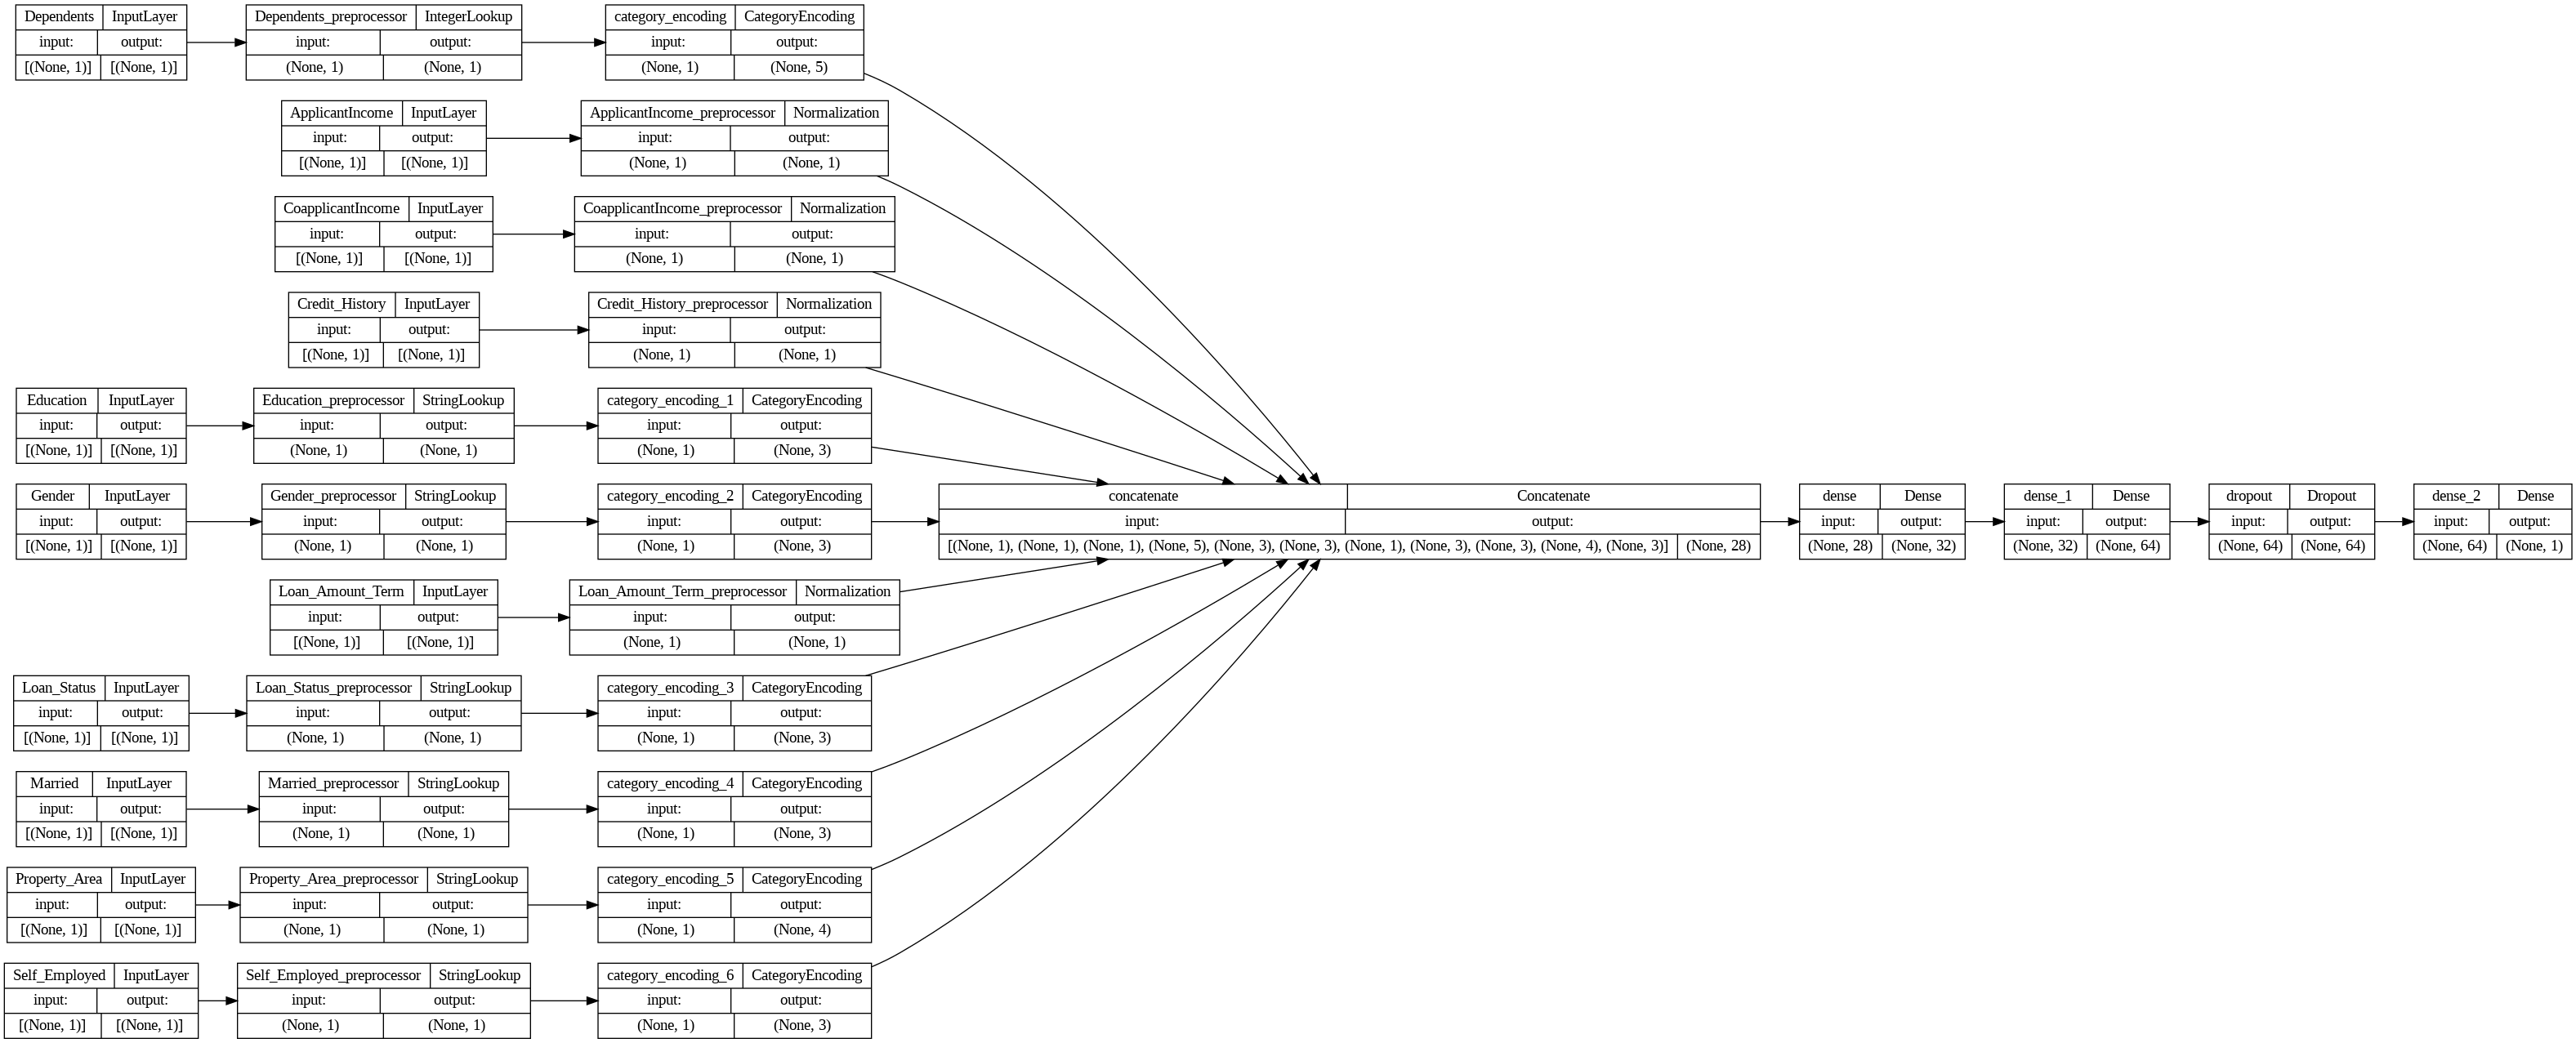

In [17]:
from keras.utils import plot_model

# Plot the model graphically
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='LR')

In [18]:
# Compile the model with Mean Squared Error (MSE) as the loss function and Mean Absolute Error (MAE) as the metric
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])


# Train the Model

In [19]:
history = model.fit(trainds,
                    epochs = 100,
                    validation_data=valds,
                    use_multiprocessing=True)

Epoch 1/100
15/15 [==============================] - 5s 133ms/step - loss: 26775.5566 - mae: 143.4714 - mse: 26775.5566 - val_loss: 32034.9941 - val_mae: 150.0470 - val_mse: 32034.9941
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 26484.8711 - mae: 142.5347 - mse: 26484.8711 - val_loss: 31680.7656 - val_mae: 148.9233 - val_mse: 31680.7656
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 26089.7871 - mae: 141.2052 - mse: 26089.7871 - val_loss: 31078.5840 - val_mae: 146.9933 - val_mse: 31078.5840
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 25305.4219 - mae: 138.5090 - mse: 25305.4219 - val_loss: 30033.2656 - val_mae: 143.5884 - val_mse: 30033.2656
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 24112.0156 - mae: 134.3284 - mse: 24112.0156 - val_loss: 28347.8418 - val_mae: 137.8784 - val_mse: 28347.8418
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 22173.8965

In [21]:
histdf=pd.DataFrame(history.history)
histdf

,loss,mae,mse,val_loss,val_mae,val_mse
0,26775.556641,143.471359,26775.556641,32034.994141,150.047012,32034.994141
1,26484.871094,142.534668,26484.871094,31680.765625,148.923309,31680.765625
2,26089.787109,141.205185,26089.787109,31078.583984,146.993301,31078.583984
3,25305.421875,138.509048,25305.421875,30033.265625,143.588409,30033.265625
4,24112.015625,134.328445,24112.015625,28347.841797,137.878372,28347.841797
...,...,...,...,...,...,...
95,4450.907227,42.595779,4450.907227,5727.702148,45.319801,5727.702148
96,4575.533203,43.825764,4575.533203,5713.258301,45.329910,5713.258301
97,4321.278320,43.552887,4321.278320,5755.872559,45.335880,5755.872559
98,3868.396973,42.456333,3868.396973,5688.672852,45.327965,5688.672852


In [25]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    # Extracting metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    mae = history.history['mae']
    val_mae = history.history['val_mae']

    mse = history.history['mse']
    val_mse = history.history['val_mse']

    epochs = range(len(history.history['loss']))

    # Plotting in 1x3 grid
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot loss
    axs[0].plot(epochs, loss, label='training_loss')
    axs[0].plot(epochs, val_loss, label='val_loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].legend()

    # Plot mae
    axs[1].plot(epochs, mae, label='training_mae')
    axs[1].plot(epochs, val_mae, label='val_mae')
    axs[1].set_title('MAE')
    axs[1].set_xlabel('Epochs')
    axs[1].legend()

    # Plot mse
    axs[2].plot(epochs, mse, label='training_mse')
    axs[2].plot(epochs, val_mse, label='val_mse')
    axs[2].set_title('MSE')
    axs[2].set_xlabel('Epochs')
    axs[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


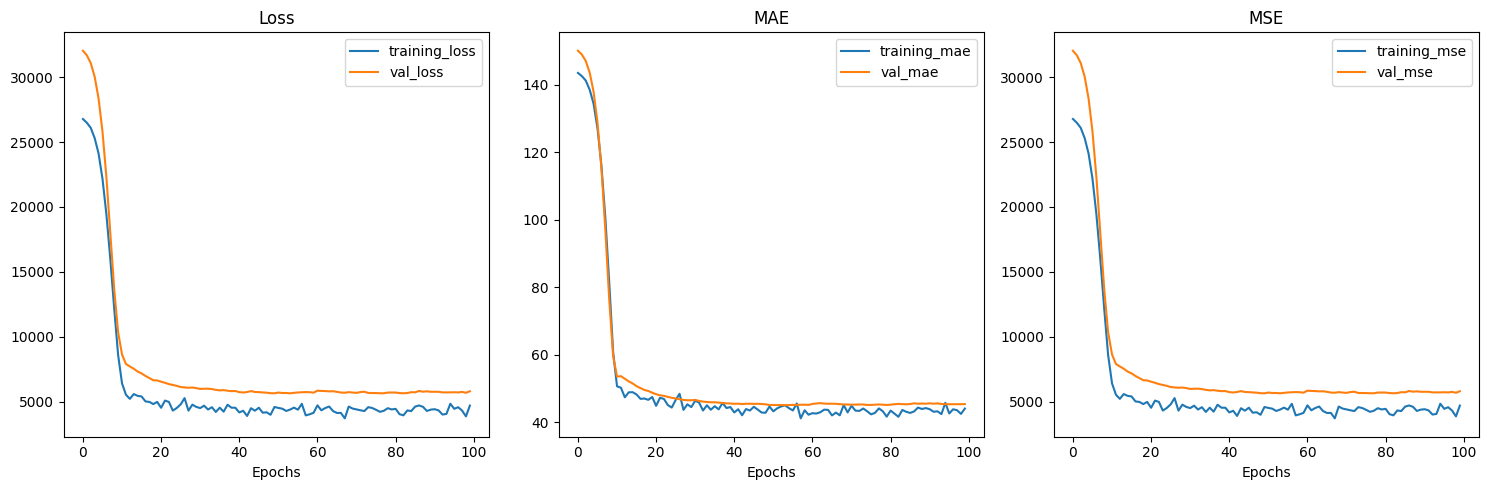

In [26]:
plot_loss_curves(history)